In [61]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("HousingData.csv")
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

In [48]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [41]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [43]:
df[['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']] = df[['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']].fillna(df[['CRIM','ZN','INDUS','CHAS','AGE','LSTAT']].mean())

In [46]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
model = DecisionTreeRegressor(max_depth = 6)
reg = model.fit(x_train,y_train)
reg

DecisionTreeRegressor(max_depth=6)

In [54]:
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))

0.9473550516257327
0.6869848265873852


In [59]:
y_prediction = model.predict(x_test)
y_prediction

array([24.93166667, 24.93166667, 20.77021277, 13.25238095, 20.77021277,
       20.81764706, 20.77021277, 20.81764706, 20.77021277, 20.77021277,
        9.61111111, 17.55      , 13.25238095,  6.58333333, 48.5       ,
       33.65555556, 20.77021277, 34.78888889, 24.93166667, 20.81764706,
       24.93166667, 20.77021277, 20.77021277, 24.93166667, 20.77021277,
       20.77021277, 20.77021277, 16.59583333, 40.75      , 19.8375    ,
       13.25238095, 13.25238095, 20.77021277, 20.77021277, 24.93166667,
       16.59583333,  9.61111111, 24.575     , 16.59583333, 17.55      ,
       20.81764706, 20.77021277, 24.93166667, 13.25238095, 24.93166667,
       24.93166667, 18.95      , 16.59583333, 15.168     , 24.93166667,
       16.59583333, 19.8375    , 20.77021277, 35.2       , 16.59583333,
       23.525     , 20.77021277, 20.77021277, 12.2       , 20.15555556,
       20.81764706, 20.77021277, 33.65555556, 33.75      , 13.25238095,
       33.75      , 16.59583333, 20.15555556, 41.3       , 20.77

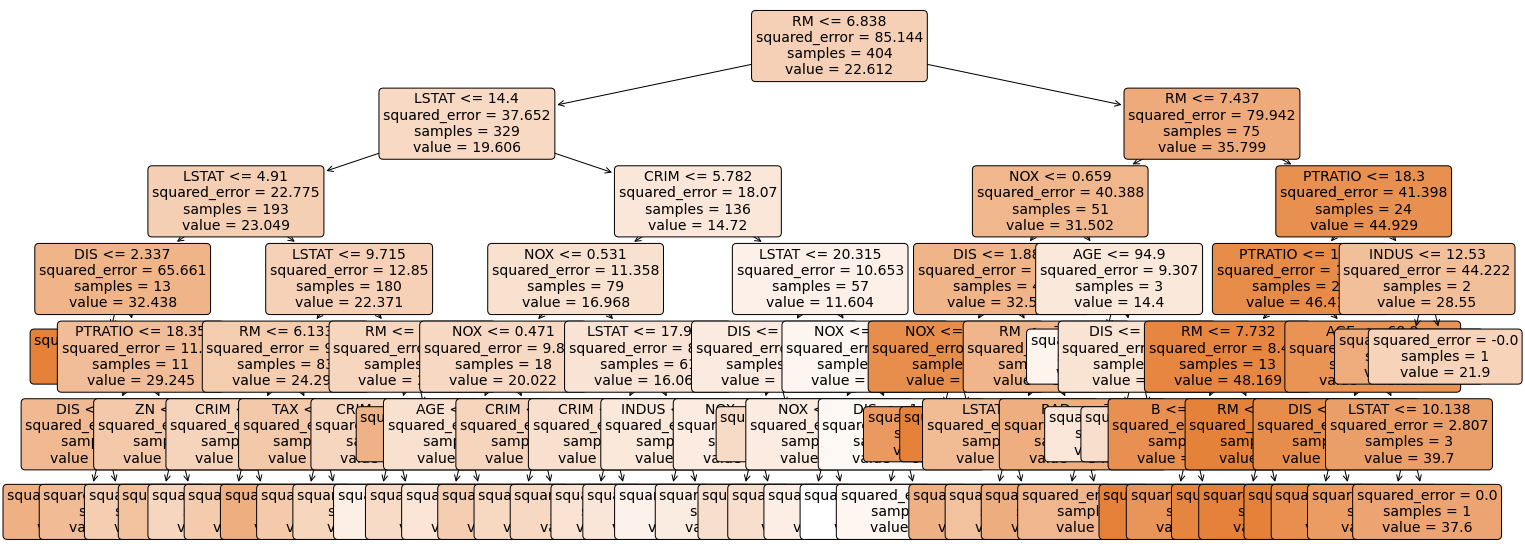

In [63]:
plt.figure(figsize=(25,10))
a = plot_tree(model, 
              feature_names=x.columns, 
              class_names=y, 
              filled=True, 
              rounded=True, 
              fontsize=14)
